In [69]:
import pandas as pd 
import numpy as np 

In [8]:
wine = pd.read_csv("C:\Data science\Data sets\PCA\wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [171]:
# normalizing the data using function 
from sklearn.preprocessing import StandardScaler
#def norm(i):
#    x = (i-i.min())/(i.max()-i.min())
#    return(x)
    
#wine_norm = norm(wine.iloc[:,1:])


#scaler = StandardScaler()
#scaler.fit(wine_norm)
#wine_scaled = scaler.transform(wine_norm)
#wine_scaled

#-----------------Normalizing without function 
from sklearn.preprocessing import scale
wine_data = wine.iloc[:,1:]
wine_n = scale(wine_data)
wine_n

array([[ 1.17224043,  1.01300893, -1.21394365, ...,  0.36217728,
         1.20407401,  1.20407401],
       [ 1.17224043,  0.96524152, -1.21394365, ...,  0.40605066,
         1.20407401,  1.20407401],
       [ 1.17224043,  1.39514818, -1.21394365, ...,  0.31830389,
         1.20407401,  1.20407401],
       ...,
       [ 0.00654883,  0.28057537,  1.37386437, ..., -1.61212515,
         0.01995703,  0.01995703],
       [ 0.00654883,  0.29649784,  1.37386437, ..., -1.56825176,
         0.01995703,  0.01995703],
       [ 0.00654883, -0.59516041,  1.37386437, ..., -1.52437837,
         0.01995703,  0.01995703]])

In [172]:
# 3 Dimentional 
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(wine_n)
wine_x = pca.transform(wine_n)
wine_x.shape

(178, 3)

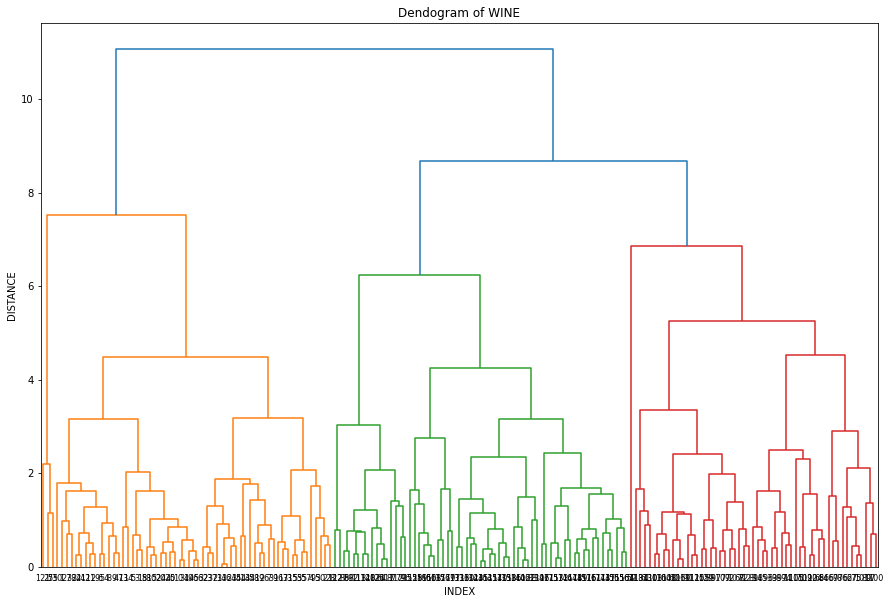

In [173]:
#Plotting dendo gram 
from scipy.cluster.hierarchy import linkage

import scipy.cluster.hierarchy as sch 
import matplotlib.pylab as plt
cl = linkage(wine_x,method="complete",metric="euclidean")
plt.figure(figsize = (15,10));plt.title("Dendogram of WINE");plt.xlabel("INDEX");plt.ylabel("DISTANCE")
sch.dendrogram(cl,leaf_rotation=0.,leaf_font_size=8.,)
plt.show()


In [178]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters =3 , linkage = 'ward', affinity = 'euclidean').fit(wine_x)
clust_label = pd.Series(ag.labels_)
wine['clust']=clust_label # creating a  new column and assigning it to new column 


wine.iloc[:,:].groupby(wine.clust).mean()

,Hue,Dilution,Proline,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,clust2
clust,,,,,,,,,,,,,,,
0,1.062708,2.803385,510.169231,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.000000
1,1.065484,3.163387,1100.225806,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,2.000000
2,0.691961,1.696667,619.058824,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.019608


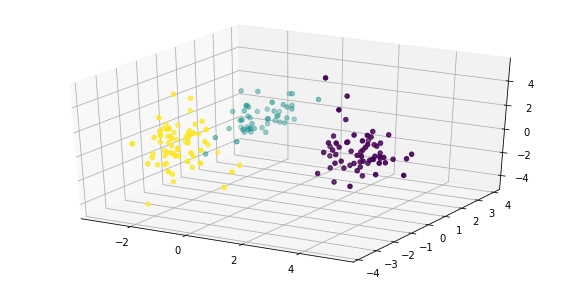

In [175]:
#Kmeans scatter plot for 3D data
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
kmeans = KMeans(n_clusters = 3).fit(wine_x)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111,projection="3d")
X= wine_x[:,0]
Y= wine_x[:,1]
Z= wine_x[:,2]
ax.scatter(X,Y,Z,c=kmeans.labels_)


In [176]:
kmeans.fit(wine_x)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [179]:
kmeans_data = pd.Series(kmeans.labels_)
wine["clust2"]= kmeans_data

wine.iloc[:,:].groupby(wine.clust2).mean()

,Hue,Dilution,clust,Proline,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color
clust2,,,,,,,,,,,,,,,
0,0.686200,1.698800,2.000000,622.440000,2.960000,13.144000,3.346200,2.42560,21.330000,98.640000,1.677200,0.807000,0.450400,1.156400,7.264400
1,1.061455,2.785000,0.030303,509.257576,2.000000,12.256818,1.889242,2.22803,20.013636,92.848485,2.244242,2.040303,0.360303,1.608939,3.015152
2,1.065484,3.163387,1.000000,1100.225806,1.048387,13.676774,1.997903,2.46629,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548
